<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import regularizers
from keras import callbacks
from keras import initializers
from keras.layers import BatchNormalization

In [113]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [114]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [115]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [116]:
w_init = initializers.glorot_normal()
b_init = initializers.Zeros()

In [117]:
model = tf.keras.Sequential()

drop_out = 0.2
lern_rat = 0.001
neurons = 128

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(neurons * 1, activation='relu', kernel_initializer=w_init, bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out))
model.add(layers.Dense(neurons * 2, activation='tanh'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out))

model.add(layers.Dense(neurons * 4, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out * 1.5))

model.add(layers.Dense(neurons * 8, activation='tanh'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out * 2))

model.add(layers.Dense(10, activation='softmax'))

In [118]:
model.compile(#optimizer='adam',
              optimizer='adamax',
              # optimizer='nadam',
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # sparse_categorical_accuracy

1/1 [==============================] - 0s 116ms/step


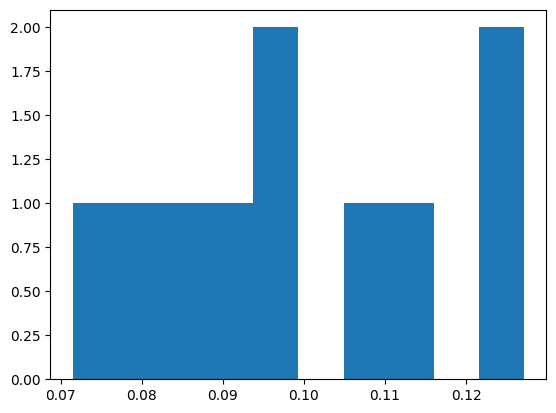

In [119]:
x = np.random.random((1, 28, 28))
a = model.predict(x)
_ = plt.hist(np.transpose(a))

In [120]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [121]:
callback = callbacks.EarlyStopping(monitor='val_loss',
                                   patience=35,
                                   restore_best_weights=True,
                                   )

In [122]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=128,
                    callbacks=[callback],
                    verbose=1, #многословие
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/300
391/391 [==============================] - 6s 9ms/step - loss: 0.8712 - accuracy: 0.7169 - val_loss: 0.5281 - val_accuracy: 0.8259
Epoch 2/300
391/391 [==============================] - 3s 7ms/step - loss: 0.6262 - accuracy: 0.7837 - val_loss: 0.4449 - val_accuracy: 0.8439
Epoch 3/300
391/391 [==============================] - 3s 7ms/step - loss: 0.5479 - accuracy: 0.8066 - val_loss: 0.4361 - val_accuracy: 0.8458
Epoch 4/300
391/391 [==============================] - 3s 7ms/step - loss: 0.4943 - accuracy: 0.8223 - val_loss: 0.3982 - val_accuracy: 0.8589
Epoch 5/300
391/391 [==============================] - 4s 9ms/step - loss: 0.4632 - accuracy: 0.8308 - val_loss: 0.3743 - val_accuracy: 0.8668
Epoch 6/300
391/391 [==============================] - 3s 7ms/step - loss: 0.4366 - accuracy: 0.8383 - val_loss: 0.3861 - val_accuracy: 0.8602
Epoch 7/300
391/391 [==============================] - 3s 7ms/step - loss: 0.4182 - accuracy: 0.8453 - val_loss: 0.3576 - val_accuracy: 0.8700

In [123]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'accuracy', 'val_loss', 'val_accuracy']


In [124]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 1s 3ms/step - loss: 0.2964 - accuracy: 0.8972
[0.2964159846305847, 0.8971999883651733]


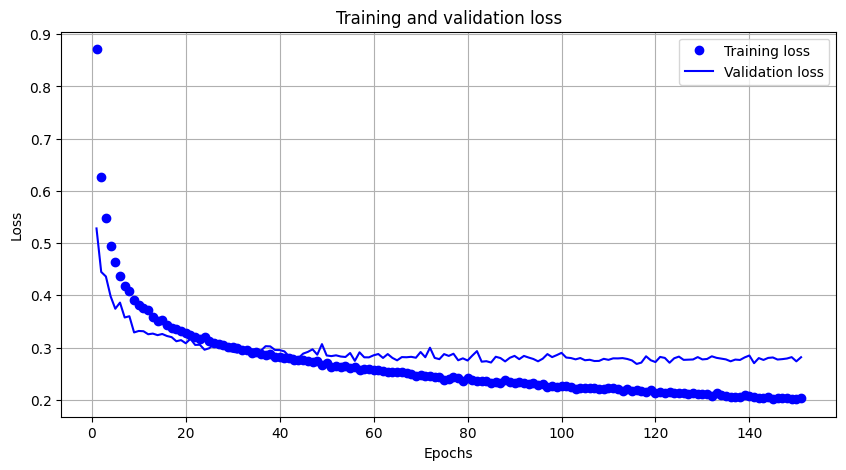

<Figure size 640x480 with 0 Axes>

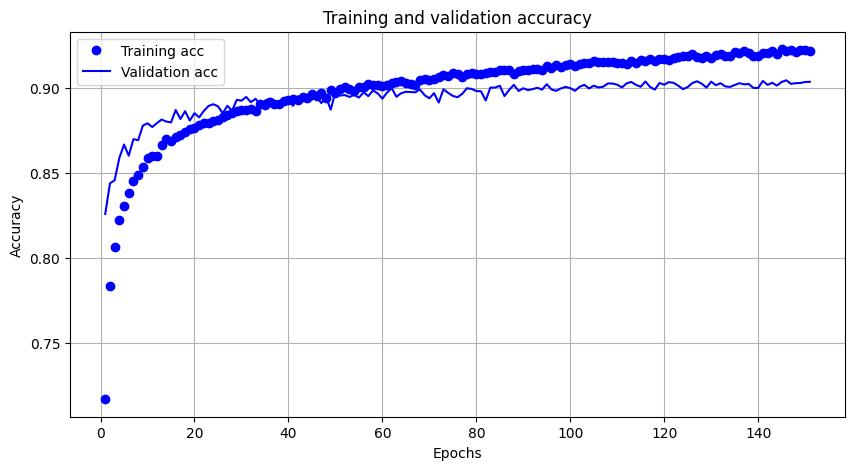

In [125]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [126]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [127]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [128]:
predictions[0]

array([0.08535603, 0.08535606, 0.08535603, 0.08535603, 0.08535603,
       0.08536215, 0.08535603, 0.08548176, 0.08535603, 0.23166384],
      dtype=float32)

In [129]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dropout_24 (Dropout)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_24 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_31 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_25 (Ba  (None, 256)               1024      
 tchNormalization)                                   